<a href="https://colab.research.google.com/github/Unknown52790/Sales-Prediction/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Importing the Libraries***

In [5]:
import pandas as pd
import tensorflow as tf
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# ***Read the Files***

In [6]:
df1 = pd.read_csv("/content/Only 2020.csv", encoding=('ISO-8859-1'))
df2 = pd.read_csv("/content/Only 2021.csv", encoding=('ISO-8859-1'))
df3 = pd.read_csv("/content/Only 2022.csv", encoding=('ISO-8859-1'))
df4 = pd.read_csv("/content/Only 2023.csv", encoding=('ISO-8859-1'))

In [7]:
print("df1:")
display(df1.head())
print("df2:")
display(df2.head())
print("df3")
display(df3.head())
print("df4")
display(df4.head())

df1:


,Division,Division Name,Sales Organization,Sales Organization Name,Distribution Channel,Distribution Channel Name,Sales Document Type,Sales Document Type.1,Sales Document,Sales Document Item,...,Delivered Quantity SU,Pending Quantity SU,Net Price,Net Value (Item),Document Currency,Exchange Rate,Delivery Date,Storage Location,Shipping Point/Receiving Pt,Plant
0,20,Finished Goods-Sanit,RK01,Sales Org RK01,10,Retailer,ZSW,Standard Order-SW,5526292,1,...,1,0,742.13,742.13,AED,1.0,07/09/2020,SCE,SW,SW
1,10,Finished Goods-Tiles,RK01,Sales Org RK01,60,Distributor,ZOR,Standard Order-Tiles,5553056,10,...,0,0,30.71,35709.59,AED,1.0,31/12/2020,T9GD,MC9,MC9
2,10,Finished Goods-Tiles,RK01,Sales Org RK01,20,Trader,ZOR,Standard Order-Tiles,5553054,10,...,36,0,39,1404.00,AED,1.0,31/12/2020,T8GD,MC8,MC8
3,10,Finished Goods-Tiles,RK01,Sales Org RK01,20,Trader,ZOR,Standard Order-Tiles,5553053,10,...,14.04,0,64.78,909.51,AED,1.0,31/12/2020,SMC8,MC8,MC8
4,20,Finished Goods-Sanit,RK01,Sales Org RK01,20,Trader,ZSW,Standard Order-SW,5553045,10,...,1,0,964.75,964.75,AED,1.0,31/12/2020,SCE,SW,SW


df2:


,Division,Division Name,Sales Organization,Sales Organization Name,Distribution Channel,Distribution Channel Name,Sales Document Type,Sales Document Type.1,Sales Document,Sales Document Item,...,Delivered Quantity SU,Pending Quantity SU,Net Price,Net Value (Item),Document Currency,Exchange Rate,Delivery Date,Storage Location,Shipping Point/Receiving Pt,Plant
0,10,Finished Goods-Tiles,RK01,Sales Org RK01,10,Retailer,ZOR,Standard Order-Tiles,5583653,1,...,0.00,0.0,108.72,3757.36,AED,1.0,02/06/2021,WMC8,MC8,MC8
1,10,Finished Goods-Tiles,RK01,Sales Org RK01,11,Own Retail,ZOR,Standard Order-Tiles,5623926,10,...,3.96,0.0,29.63,117.33,AED,1.0,30/12/2021,T7GD,MC7,MC7
2,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5623925,10,...,3.00,0.0,159.64,478.92,AED,1.0,30/12/2021,SCE,SW,SW
3,10,Finished Goods-Tiles,RK01,Sales Org RK01,11,Own Retail,ZOR,Standard Order-Tiles,5623922,10,...,144.84,0.0,20.88,3024.26,AED,1.0,30/12/2021,T9GD,MC9,MC9
4,10,Finished Goods-Tiles,RK01,Sales Org RK01,11,Own Retail,ZOR,Standard Order-Tiles,5623921,10,...,60.80,0.0,66.72,4056.58,AED,1.0,30/12/2021,M3GD,MC3,MC3


df3


,Division,Division Name,Sales Organization,Sales Organization Name,Distribution Channel,Distribution Channel Name,Sales Document Type,Sales Document Type.1,Sales Document,Sales Document Item,...,Delivered Quantity SU,Pending Quantity SU,Net Price,Net Value (Item),Document Currency,Exchange Rate,Delivery Date,Storage Location,Shipping Point/Receiving Pt,Plant
0,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5695615,10,...,4.0,0.0,400.00,1600.00,AED,1.0,01/02/2023,EL01,EL01,EL01
1,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5695613,10,...,2.0,0.0,910.00,1820.00,AED,1.0,05/01/2023,SCE,SW,SW
2,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5695611,10,...,1.0,0.0,329.99,329.99,AED,1.0,31/12/2022,SCE,SW,SW
3,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5695610,10,...,2.0,0.0,98.80,197.60,AED,1.0,04/01/2023,EL01,EL01,EL01
4,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5695608,10,...,1.0,0.0,32.50,32.50,AED,1.0,31/12/2022,SU10,EL01,EL01


df4


,Division,Division Name,Sales Organization,Sales Organization Name,Distribution Channel,Distribution Channel Name,Sales Document Type,Sales Document Type.1,Sales Document,Sales Document Item,...,Delivered Quantity SU,Pending Quantity SU,Net Price,Net Value (Item),Document Currency,Exchange Rate,Delivery Date,Storage Location,Shipping Point/Receiving Pt,Plant
0,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5767407,10,...,0.0,2.0,88.00,176.00,AED,1.0,06/01/2024,EL01,EL01,EL01
1,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5767404,10,...,0.0,10.0,519.20,5192.00,AED,1.0,30/12/2023,SCE,SW,SW
2,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5767396,10,...,0.0,2.0,396.50,793.00,AED,1.0,05/01/2024,SCE,SW,SW
3,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5767391,10,...,0.0,1.0,423.80,423.80,AED,1.0,30/12/2023,SBT,SW,SW
4,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5767389,10,...,0.0,1.0,620.75,620.75,AED,1.0,30/12/2023,SCE,SW,SW


# ***Merge all the Datasets***

In [8]:
df = pd.concat([df1, df2, df3, df4])

In [9]:
df= pd.concat([df1, df2, df3, df4], ignore_index=True)

In [10]:
df1.shape

(42614, 28)

In [11]:
df2.shape

(41155, 28)

In [12]:
df3.shape

(45075, 28)

In [13]:
df4.shape

(5844, 28)

In [14]:
df.shape

(134688, 28)

# ***Data Frame Functions***

In [15]:
df.head()

,Division,Division Name,Sales Organization,Sales Organization Name,Distribution Channel,Distribution Channel Name,Sales Document Type,Sales Document Type.1,Sales Document,Sales Document Item,...,Delivered Quantity SU,Pending Quantity SU,Net Price,Net Value (Item),Document Currency,Exchange Rate,Delivery Date,Storage Location,Shipping Point/Receiving Pt,Plant
0,20,Finished Goods-Sanit,RK01,Sales Org RK01,10,Retailer,ZSW,Standard Order-SW,5526292,1,...,1,0,742.13,742.13,AED,1.0,07/09/2020,SCE,SW,SW
1,10,Finished Goods-Tiles,RK01,Sales Org RK01,60,Distributor,ZOR,Standard Order-Tiles,5553056,10,...,0,0,30.71,35709.59,AED,1.0,31/12/2020,T9GD,MC9,MC9
2,10,Finished Goods-Tiles,RK01,Sales Org RK01,20,Trader,ZOR,Standard Order-Tiles,5553054,10,...,36,0,39,1404.00,AED,1.0,31/12/2020,T8GD,MC8,MC8
3,10,Finished Goods-Tiles,RK01,Sales Org RK01,20,Trader,ZOR,Standard Order-Tiles,5553053,10,...,14.04,0,64.78,909.51,AED,1.0,31/12/2020,SMC8,MC8,MC8
4,20,Finished Goods-Sanit,RK01,Sales Org RK01,20,Trader,ZSW,Standard Order-SW,5553045,10,...,1,0,964.75,964.75,AED,1.0,31/12/2020,SCE,SW,SW


In [16]:
df.tail()

,Division,Division Name,Sales Organization,Sales Organization Name,Distribution Channel,Distribution Channel Name,Sales Document Type,Sales Document Type.1,Sales Document,Sales Document Item,...,Delivered Quantity SU,Pending Quantity SU,Net Price,Net Value (Item),Document Currency,Exchange Rate,Delivery Date,Storage Location,Shipping Point/Receiving Pt,Plant
134683,20,Finished Goods-Sanit,RK01,Sales Org RK01,22,Traders/Retailers,ZSW,Standard Order-SW,5747363,1830,...,0.0,14.0,153.0,3672.0,AED,1.0,20/01/2024,SCE,SW,SW
134684,20,Finished Goods-Sanit,RK01,Sales Org RK01,22,Traders/Retailers,ZSW,Standard Order-SW,5747363,1830,...,10.0,0.0,153.0,3672.0,AED,1.0,25/12/2023,SCE,SW,SW
134685,20,Finished Goods-Sanit,RK01,Sales Org RK01,22,Traders/Retailers,ZSW,Standard Order-SW,5747363,1840,...,10.0,14.0,0.0,0.0,AED,1.0,20/01/2024,SCE,SW,SW
134686,20,Finished Goods-Sanit,RK01,Sales Org RK01,22,Traders/Retailers,ZSW,Standard Order-SW,5747363,1850,...,10.0,14.0,0.0,0.0,AED,1.0,20/01/2024,SCE,SW,SW
134687,20,Finished Goods-Sanit,RK01,Sales Org RK01,22,Traders/Retailers,ZSW,Standard Order-SW,5747363,1860,...,0.0,15.0,22.1,331.5,AED,1.0,20/01/2024,SCE,SW,SW


In [17]:
df.describe()

,Division,Distribution Channel,Sales Document,Sales Document Item,Sold-To Party,Order Quantity (Schedule Line),Net Value (Item),Exchange Rate
count,134688.000000,134688.000000,1.346880e+05,134688.000000,1.346870e+05,134687.000000,1.346860e+05,134686.000000
mean,16.298185,18.133234,5.596041e+06,65.665004,2.421441e+06,74.012938,4.790000e+03,1.101504
std,4.828549,10.786676,1.037220e+05,158.105537,2.461211e+06,351.504287,3.846109e+04,0.547836
min,10.000000,10.000000,2.210000e+03,1.000000,1.100000e+01,0.000000,-1.000000e-02,0.978350
25%,10.000000,10.000000,5.538930e+06,10.000000,1.430700e+04,2.000000,1.999650e+02,1.000000
50%,20.000000,11.000000,5.597590e+06,20.000000,9.602400e+04,7.100000,6.975000e+02,1.000000
75%,20.000000,22.000000,5.637439e+06,40.000000,5.028643e+06,36.000000,2.268000e+03,1.000000
max,20.000000,84.000000,5.767407e+06,2290.000000,5.075215e+06,35549.700000,3.111460e+06,5.211590


# ***Before Clearing the Null Values***

In [18]:
df.isnull().sum()

Division                          0
Division Name                     0
Sales Organization                0
Sales Organization Name           0
Distribution Channel              0
Distribution Channel Name         0
Sales Document Type               0
Sales Document Type.1             0
Sales Document                    0
Sales Document Item               0
Document Date                     1
Sold-To Party                     1
Sold-To Party Name                1
Material                          1
Item Type                         1
Sched.line category               1
Sales Unit                        1
Order Quantity (Schedule Line)    1
Delivered Quantity SU             2
Pending Quantity SU               2
Net Price                         2
Net Value (Item)                  2
Document Currency                 2
Exchange Rate                     2
Delivery Date                     2
Storage Location                  2
Shipping Point/Receiving Pt       2
Plant                       

# ***Clearing all the Null Values***

In [19]:
df['Sales Organization'].value_counts()

RK01    134688
Name: Sales Organization, dtype: int64

In [20]:
df['Sales Organization'].mode()

0    RK01
Name: Sales Organization, dtype: object

In [21]:
df['Sales Organization'].fillna(df['Sales Organization'].mode()[0],inplace=True)

In [22]:
df['Sales Organization Name'].value_counts()

Sales Org RK01    134688
Name: Sales Organization Name, dtype: int64

In [23]:
df['Sales Organization Name'].mode()

0    Sales Org RK01
Name: Sales Organization Name, dtype: object

In [24]:
df['Sales Organization Name'].fillna(df['Sales Organization Name'].mode()[0],inplace=True)

In [25]:
df['Distribution Channel'].value_counts()

11    35558
10    34742
22    21051
20    18812
31     8389
30     6486
60     4895
24     3390
25      834
14      294
42      102
40       87
43       20
27       18
76        4
84        3
26        3
Name: Distribution Channel, dtype: int64

In [26]:
df['Distribution Channel'].mode()

0    11
Name: Distribution Channel, dtype: int64

In [27]:
df['Distribution Channel'].fillna(df['Distribution Channel'].mode()[0],inplace=True)

In [28]:
df['Distribution Channel Name'].mode()

0    Own Retail
Name: Distribution Channel Name, dtype: object

In [29]:
df['Distribution Channel Name'].fillna(df['Distribution Channel Name'].mode()[0],inplace=True)

In [30]:
df['Sales Document Type'].mode()

0    ZSW
Name: Sales Document Type, dtype: object

In [31]:
df['Sales Document Type'].fillna(df['Sales Document Type'].mode()[0],inplace=True)

In [32]:
df['Sales Document Type.1'].mode()

0    Standard Order-SW
Name: Sales Document Type.1, dtype: object

In [33]:
df['Sales Document Type.1'].fillna(df['Sales Document Type.1'].mode()[0],inplace=True)

In [34]:
df['Sales Document'].mode()

0    5655761
Name: Sales Document, dtype: int64

In [35]:
df['Sales Document'].fillna(df['Sales Document'].mode()[0],inplace=True)

In [36]:
df['Sales Document Item'].mode()

0    10
Name: Sales Document Item, dtype: int64

In [37]:
df['Sales Document Item'].fillna(df['Sales Document Item'].mode()[0],inplace=True)

In [38]:
df['Document Date'].mode()

0    17/12/2022
Name: Document Date, dtype: object

In [39]:
df['Document Date'].fillna(df['Document Date'].mode()[0],inplace=True)

In [40]:
df['Sold-To Party'].mode()

0    901.0
Name: Sold-To Party, dtype: float64

In [41]:
df['Sold-To Party'].fillna(df['Sold-To Party'].mode()[0],inplace=True)

In [42]:
df['Sold-To Party Name'].mode()

0    PRIME TECH. TRADING EST. LLC
Name: Sold-To Party Name, dtype: object

In [43]:
df['Sold-To Party Name'].fillna(df['Sold-To Party Name'].mode()[0],inplace=True)

In [44]:
df['Material'].mode()

0    FS37UK
Name: Material, dtype: object

In [45]:
df['Material'].fillna(df['Material'].mode()[0],inplace=True)

In [46]:
df['Item Type'].mode()

0    SW CERAMIC ITEMS
Name: Item Type, dtype: object

In [47]:
df['Item Type'].fillna(df['Item Type'].mode()[0],inplace=True)

In [48]:
df['Sched.line category'].mode()

0    ZQ
Name: Sched.line category, dtype: object

In [49]:
df['Sched.line category'].fillna(df['Sched.line category'].mode()[0],inplace=True)

In [50]:
df['Sales Unit'].mode()

0    PC
Name: Sales Unit, dtype: object

In [51]:
df['Sales Unit'].fillna(df['Sales Unit'].mode()[0],inplace=True)

In [52]:
df['Order Quantity (Schedule Line)'].mode()

0    1.0
Name: Order Quantity (Schedule Line), dtype: float64

In [53]:
df['Order Quantity (Schedule Line)'].fillna(df['Order Quantity (Schedule Line)'].mode()[0],inplace=True)

In [54]:
df['Delivered Quantity SU'].mode()

0    1.0
Name: Delivered Quantity SU, dtype: object

In [55]:
df['Delivered Quantity SU'].fillna(df['Delivered Quantity SU'].mode()[0],inplace=True)

In [56]:
df['Pending Quantity SU'].mode()

0    0.0
Name: Pending Quantity SU, dtype: object

In [57]:
df['Pending Quantity SU'].fillna(df['Pending Quantity SU'].mode()[0],inplace=True)

In [58]:
df['Net Price'].mode()

0    0.0
Name: Net Price, dtype: object

In [59]:
df['Net Price'].fillna(df['Net Price'].mode()[0],inplace=True)

In [60]:
df['Net Value (Item)'].mode()

0    0.0
Name: Net Value (Item), dtype: float64

In [61]:
df['Net Value (Item)'].fillna(df['Net Value (Item)'].mode()[0],inplace=True)

In [62]:
df['Document Currency'].mode()

0    AED
Name: Document Currency, dtype: object

In [63]:
df['Document Currency'].fillna(df['Document Currency'].mode()[0],inplace=True)

In [64]:
df['Exchange Rate'].mode()

0    1.0
Name: Exchange Rate, dtype: float64

In [65]:
df['Exchange Rate'].fillna(df['Exchange Rate'].mode()[0],inplace=True)

In [66]:
df['Delivery Date'].mode()

0    17/12/2022
Name: Delivery Date, dtype: object

In [67]:
df['Delivery Date'].fillna(df['Delivery Date'].mode()[0],inplace=True)

In [68]:
df['Storage Location'].mode()

0    SCE
Name: Storage Location, dtype: object

In [69]:
df['Storage Location'].fillna(df['Storage Location'].mode()[0],inplace=True)

In [70]:
df['Shipping Point/Receiving Pt'].mode()

0    SW
Name: Shipping Point/Receiving Pt, dtype: object

In [71]:
df['Shipping Point/Receiving Pt'].fillna(df['Shipping Point/Receiving Pt'].mode()[0],inplace=True)

In [72]:
df['Plant'].mode()

0    SW
Name: Plant, dtype: object

In [73]:
df['Plant'].fillna(df['Plant'].mode()[0],inplace=True)

# ***After Clearing the Null Values***

In [74]:
df.isnull().sum()

Division                          0
Division Name                     0
Sales Organization                0
Sales Organization Name           0
Distribution Channel              0
Distribution Channel Name         0
Sales Document Type               0
Sales Document Type.1             0
Sales Document                    0
Sales Document Item               0
Document Date                     0
Sold-To Party                     0
Sold-To Party Name                0
Material                          0
Item Type                         0
Sched.line category               0
Sales Unit                        0
Order Quantity (Schedule Line)    0
Delivered Quantity SU             0
Pending Quantity SU               0
Net Price                         0
Net Value (Item)                  0
Document Currency                 0
Exchange Rate                     0
Delivery Date                     0
Storage Location                  0
Shipping Point/Receiving Pt       0
Plant                       

In [75]:
df.drop(['Sales Organization', 'Sales Organization Name', 'Sales Document'], axis=1, inplace=True)

<ipython-input-76-67f27b2a9dfe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")


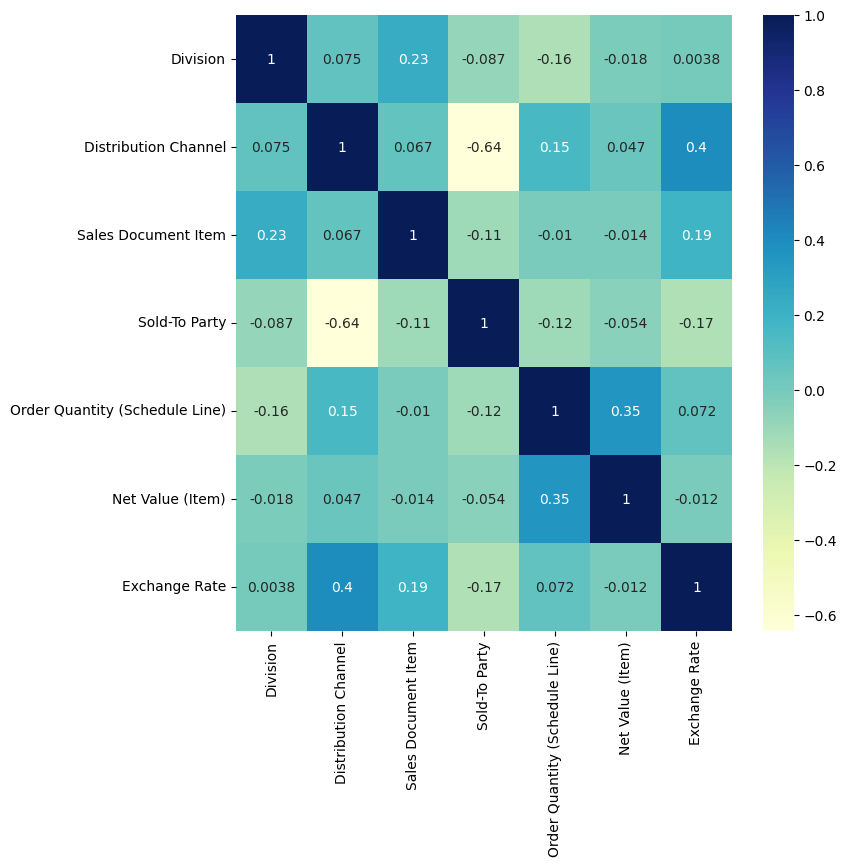

In [76]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")
plt.show()

<ipython-input-77-3193fecaa220>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap="icefire")


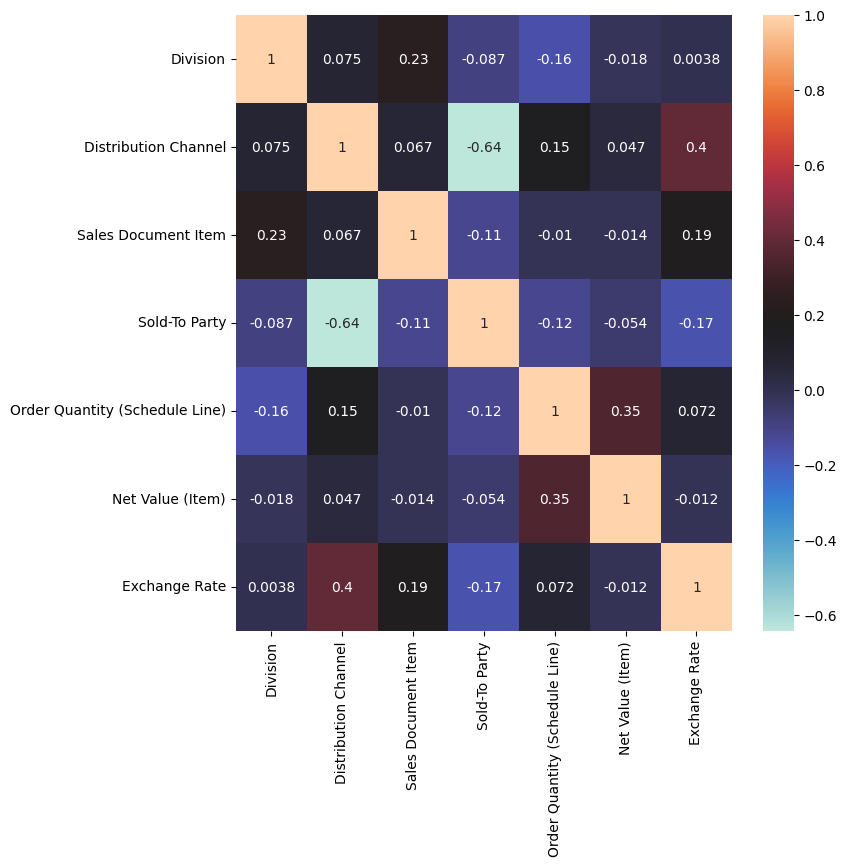

In [77]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(),annot=True, cmap="icefire")
plt.show()

# ***Exploratory Data Analysis***

# ***Using Klib Library***

In [78]:
!pip install klib
import klib

<Axes: title={'center': 'Feature-correlation (pearson)'}>

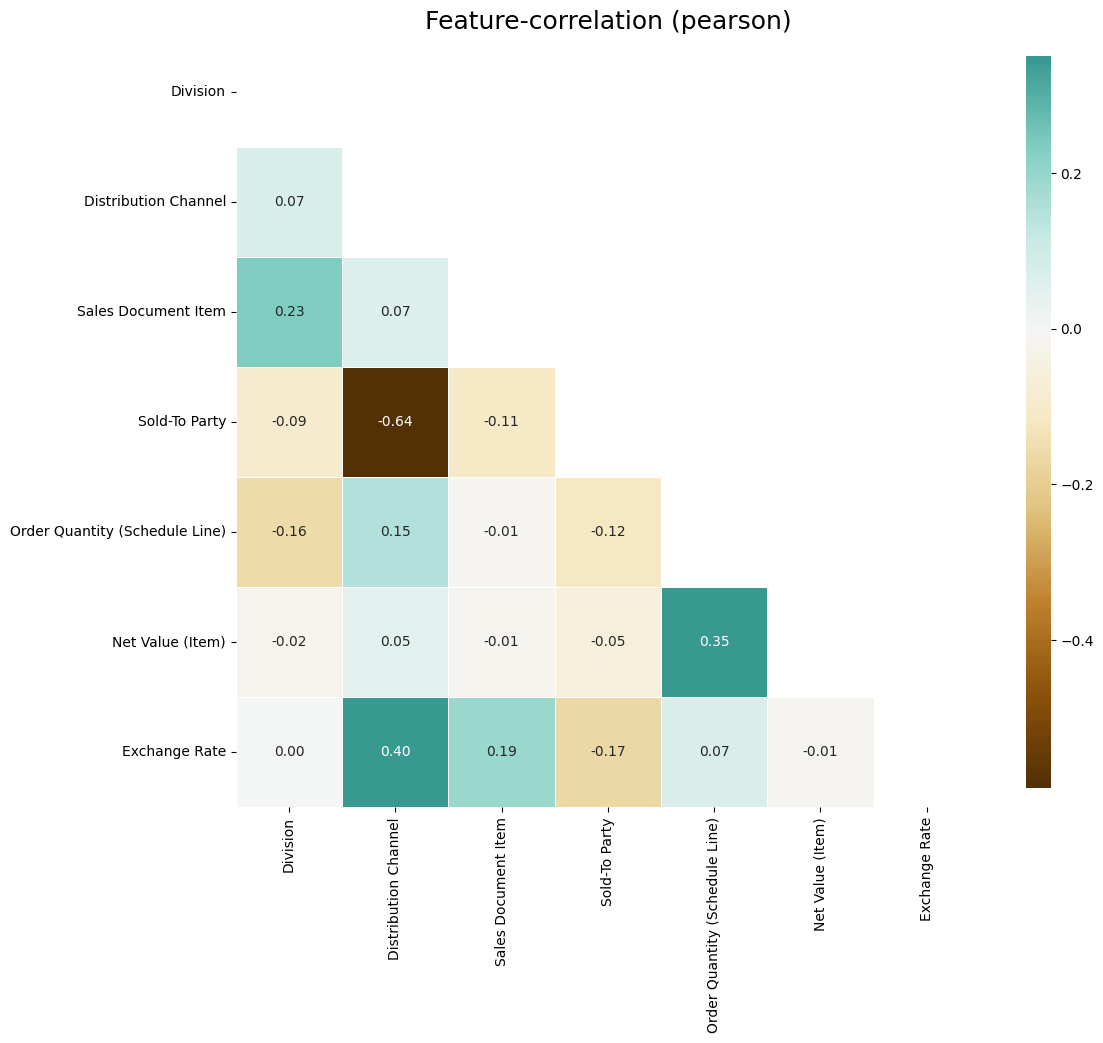

In [79]:
klib.corr_plot(df)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Axes: xlabel='Exchange Rate', ylabel='Density'>

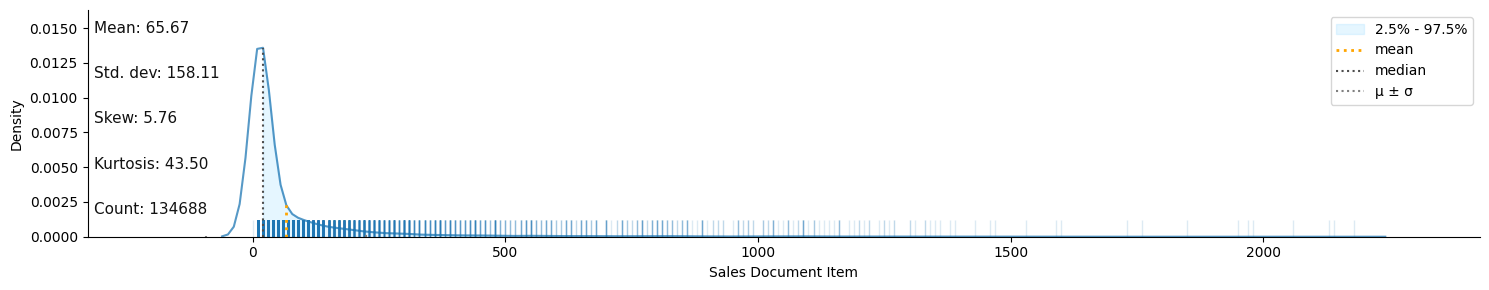

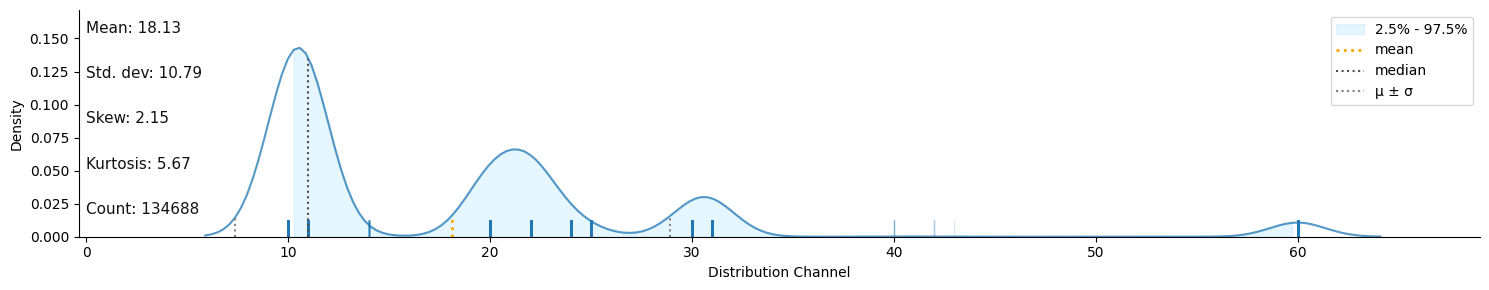

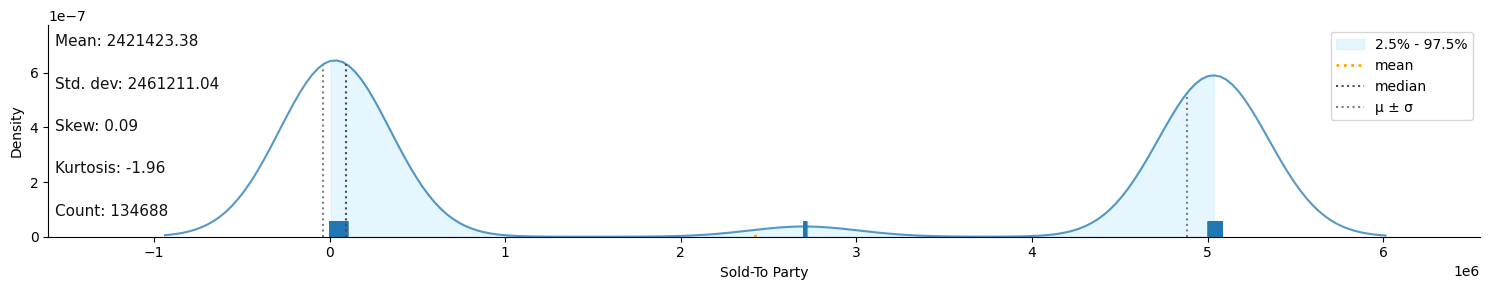

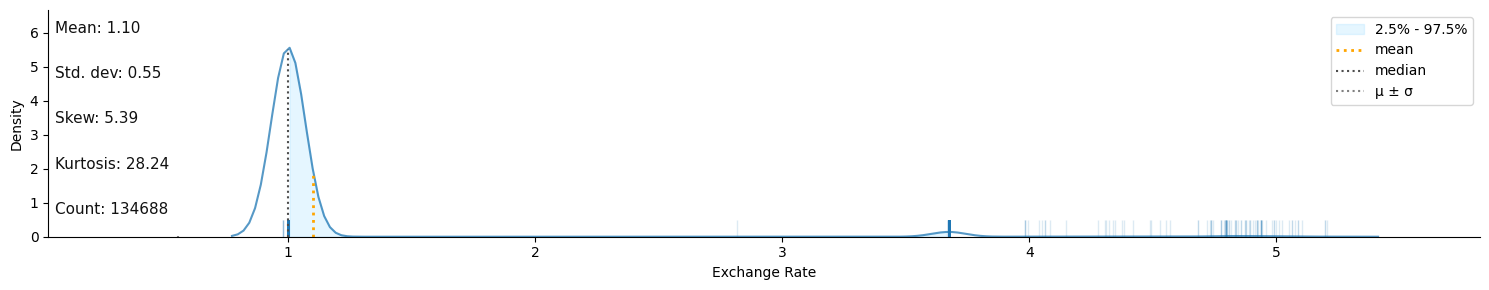

In [80]:
klib.dist_plot(df['Sales Document Item'])
klib.dist_plot(df['Distribution Channel'])
klib.dist_plot(df['Sold-To Party'])
klib.dist_plot(df['Exchange Rate'])

<ipython-input-81-a9e1dea3553f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales Document Item'], kde=True, bins = 70)


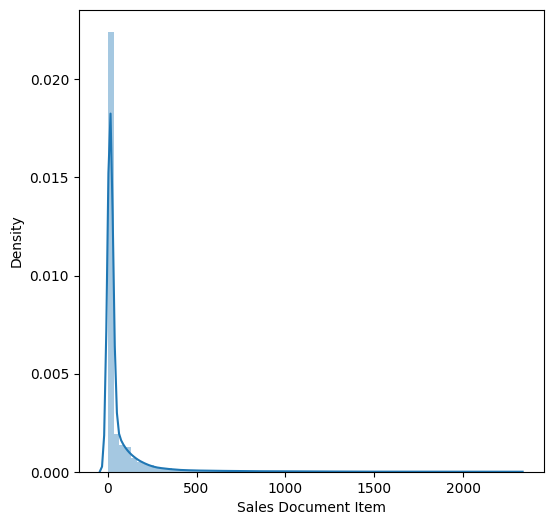

In [81]:
import seaborn as sns
plt.figure(figsize=(6, 6))
sns.distplot(df['Sales Document Item'], kde=True, bins = 70)
plt.show()

<Figure size 600x600 with 0 Axes>

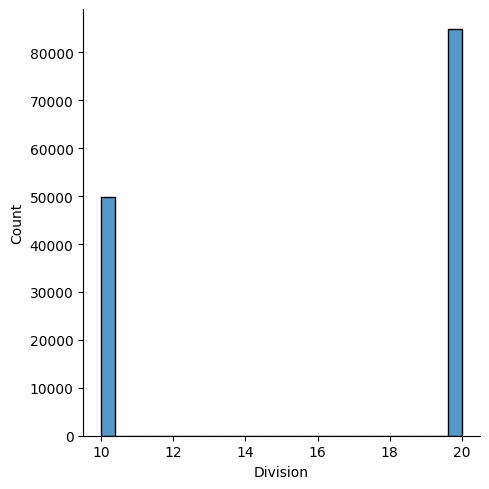

In [82]:
plt.figure(figsize=(6, 6))
sns.displot(df['Division'])
plt.show()

<ipython-input-83-5a7828c687a0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Distribution Channel'])


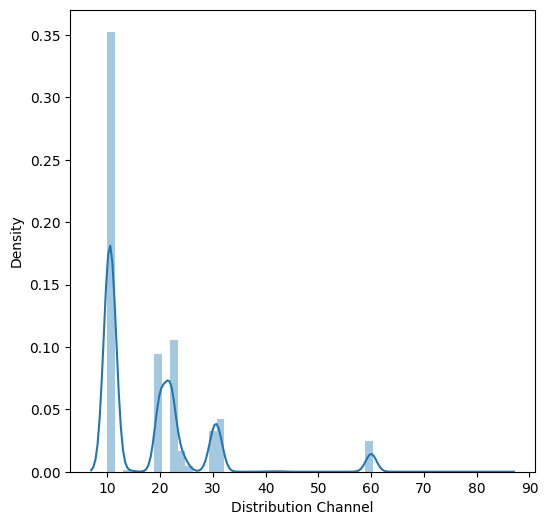

In [83]:
plt.figure(figsize=(6, 6))
sns.distplot(df['Distribution Channel'])
plt.show()

<Figure size 100x200 with 0 Axes>

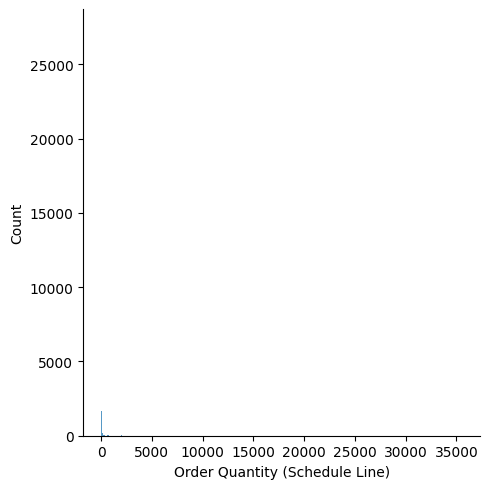

In [84]:
plt.figure(figsize=(1, 2))
sns.displot(df['Order Quantity (Schedule Line)'])
plt.show()

# ***Using Label Encoder***

In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [86]:
df.head()

,Division,Division Name,Distribution Channel,Distribution Channel Name,Sales Document Type,Sales Document Type.1,Sales Document Item,Document Date,Sold-To Party,Sold-To Party Name,...,Delivered Quantity SU,Pending Quantity SU,Net Price,Net Value (Item),Document Currency,Exchange Rate,Delivery Date,Storage Location,Shipping Point/Receiving Pt,Plant
0,20,Finished Goods-Sanit,10,Retailer,ZSW,Standard Order-SW,1,07/09/2020,5018478.0,FATEMA SALEM SAEED,...,1,0,742.13,742.13,AED,1.0,07/09/2020,SCE,SW,SW
1,10,Finished Goods-Tiles,60,Distributor,ZOR,Standard Order-Tiles,10,31/12/2020,85224.0,KSA Direct & Indirect Operations,...,0,0,30.71,35709.59,AED,1.0,31/12/2020,T9GD,MC9,MC9
2,10,Finished Goods-Tiles,20,Trader,ZOR,Standard Order-Tiles,10,31/12/2020,7622.0,ZARWANI TRDG & IMPORTING EST.,...,36,0,39,1404.00,AED,1.0,31/12/2020,T8GD,MC8,MC8
3,10,Finished Goods-Tiles,20,Trader,ZOR,Standard Order-Tiles,10,31/12/2020,903.0,AL TADAMON GENERAL TRADG,...,14.04,0,64.78,909.51,AED,1.0,31/12/2020,SMC8,MC8,MC8
4,20,Finished Goods-Sanit,20,Trader,ZSW,Standard Order-SW,10,31/12/2020,901.0,PRIME TECH. TRADING EST. LLC,...,1,0,964.75,964.75,AED,1.0,31/12/2020,SCE,SW,SW


In [87]:
df['Division Name'] = le.fit_transform(df['Division Name'])
df['Distribution Channel Name'] = le.fit_transform(df['Distribution Channel Name'])
df['Sales Document Type'] = le.fit_transform(df['Sales Document Type'])
df['Sales Document Type.1'] = le.fit_transform(df['Sales Document Type.1'])
df['Sold-To Party Name'] = le.fit_transform(df['Sold-To Party Name'])
df['Material'] = le.fit_transform(df['Material'])
df['Item Type'] = le.fit_transform(df['Item Type'])
df['Sched.line category'] = le.fit_transform(df['Sched.line category'])
df['Sales Unit'] = le.fit_transform(df['Sales Unit'])
df['Document Currency'] = le.fit_transform(df['Document Currency'])
df['Storage Location'] = le.fit_transform(df['Storage Location'])
df['Shipping Point/Receiving Pt'] = le.fit_transform(df['Shipping Point/Receiving Pt'])
df['Plant'] = le.fit_transform(df['Plant'])

In [88]:
df.head()

,Division,Division Name,Distribution Channel,Distribution Channel Name,Sales Document Type,Sales Document Type.1,Sales Document Item,Document Date,Sold-To Party,Sold-To Party Name,...,Delivered Quantity SU,Pending Quantity SU,Net Price,Net Value (Item),Document Currency,Exchange Rate,Delivery Date,Storage Location,Shipping Point/Receiving Pt,Plant
0,20,0,10,13,1,0,1,07/09/2020,5018478.0,7782,...,1,0,742.13,742.13,0,1.0,07/09/2020,40,15,15
1,10,1,60,6,0,1,10,31/12/2020,85224.0,11846,...,0,0,30.71,35709.59,0,1.0,31/12/2020,65,13,13
2,10,1,20,14,0,1,10,31/12/2020,7622.0,21779,...,36,0,39,1404.00,0,1.0,31/12/2020,64,12,12
3,10,1,20,14,0,1,10,31/12/2020,903.0,3683,...,14.04,0,64.78,909.51,0,1.0,31/12/2020,46,12,12
4,20,0,20,14,1,0,10,31/12/2020,901.0,16738,...,1,0,964.75,964.75,0,1.0,31/12/2020,40,15,15


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134688 entries, 0 to 134687
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Division                        134688 non-null  int64  
 1   Division Name                   134688 non-null  int64  
 2   Distribution Channel            134688 non-null  int64  
 3   Distribution Channel Name       134688 non-null  int64  
 4   Sales Document Type             134688 non-null  int64  
 5   Sales Document Type.1           134688 non-null  int64  
 6   Sales Document Item             134688 non-null  int64  
 7   Document Date                   134688 non-null  object 
 8   Sold-To Party                   134688 non-null  float64
 9   Sold-To Party Name              134688 non-null  int64  
 10  Material                        134688 non-null  int64  
 11  Item Type                       134688 non-null  int64  
 12  Sched.line categ

In [90]:
df.dtypes

Division                            int64
Division Name                       int64
Distribution Channel                int64
Distribution Channel Name           int64
Sales Document Type                 int64
Sales Document Type.1               int64
Sales Document Item                 int64
Document Date                      object
Sold-To Party                     float64
Sold-To Party Name                  int64
Material                            int64
Item Type                           int64
Sched.line category                 int64
Sales Unit                          int64
Order Quantity (Schedule Line)    float64
Delivered Quantity SU              object
Pending Quantity SU                object
Net Price                          object
Net Value (Item)                  float64
Document Currency                   int64
Exchange Rate                     float64
Delivery Date                      object
Storage Location                    int64
Shipping Point/Receiving Pt       

In [91]:
df['Document Date'] = pd.to_datetime(df['Document Date'], format='%d/%m/%Y')

In [92]:
df.dtypes

Division                                   int64
Division Name                              int64
Distribution Channel                       int64
Distribution Channel Name                  int64
Sales Document Type                        int64
Sales Document Type.1                      int64
Sales Document Item                        int64
Document Date                     datetime64[ns]
Sold-To Party                            float64
Sold-To Party Name                         int64
Material                                   int64
Item Type                                  int64
Sched.line category                        int64
Sales Unit                                 int64
Order Quantity (Schedule Line)           float64
Delivered Quantity SU                     object
Pending Quantity SU                       object
Net Price                                 object
Net Value (Item)                         float64
Document Currency                          int64
Exchange Rate       

# ***Creating A Few Extra Columns called "Year, Month, Day, Weekday"***

In [93]:
df['year'] = df['Document Date'].dt.year
df['month'] = df['Document Date'].dt.month
df['day'] = df['Document Date'].dt.day
df['weekday'] = df['Document Date'].dt.weekday
df['weekday'] = np.where(df.weekday == 0, 7, df.weekday)

In [94]:
df_all=df[['Document Date','year','month','day','weekday','Net Value (Item)']]
df_all.head(5)

,Document Date,year,month,day,weekday,Net Value (Item)
0,2020-09-07,2020,9,7,7,742.13
1,2020-12-31,2020,12,31,3,35709.59
2,2020-12-31,2020,12,31,3,1404.00
3,2020-12-31,2020,12,31,3,909.51
4,2020-12-31,2020,12,31,3,964.75


# ***Convert To DateTime Format***

In [95]:
df['Delivery Date'] = pd.to_datetime(df["Delivery Date"], format='%d/%m/%Y')

In [96]:
df['del year'] = df['Delivery Date'].dt.year
df['del month'] = df['Delivery Date'].dt.month
df['del day'] = df['Delivery Date'].dt.day

In [97]:
df.head(5)

,Division,Division Name,Distribution Channel,Distribution Channel Name,Sales Document Type,Sales Document Type.1,Sales Document Item,Document Date,Sold-To Party,Sold-To Party Name,...,Storage Location,Shipping Point/Receiving Pt,Plant,year,month,day,weekday,del year,del month,del day
0,20,0,10,13,1,0,1,2020-09-07,5018478.0,7782,...,40,15,15,2020,9,7,7,2020,9,7
1,10,1,60,6,0,1,10,2020-12-31,85224.0,11846,...,65,13,13,2020,12,31,3,2020,12,31
2,10,1,20,14,0,1,10,2020-12-31,7622.0,21779,...,64,12,12,2020,12,31,3,2020,12,31
3,10,1,20,14,0,1,10,2020-12-31,903.0,3683,...,46,12,12,2020,12,31,3,2020,12,31
4,20,0,20,14,1,0,10,2020-12-31,901.0,16738,...,40,15,15,2020,12,31,3,2020,12,31


In [98]:
df.tail()

,Division,Division Name,Distribution Channel,Distribution Channel Name,Sales Document Type,Sales Document Type.1,Sales Document Item,Document Date,Sold-To Party,Sold-To Party Name,...,Storage Location,Shipping Point/Receiving Pt,Plant,year,month,day,weekday,del year,del month,del day
134683,20,0,22,15,1,0,1830,2023-09-25,2713333.0,3073,...,40,15,15,2023,9,25,7,2024,1,20
134684,20,0,22,15,1,0,1830,2023-09-25,2713333.0,3073,...,40,15,15,2023,9,25,7,2023,12,25
134685,20,0,22,15,1,0,1840,2023-09-25,2713333.0,3073,...,40,15,15,2023,9,25,7,2024,1,20
134686,20,0,22,15,1,0,1850,2023-09-25,2713333.0,3073,...,40,15,15,2023,9,25,7,2024,1,20
134687,20,0,22,15,1,0,1860,2023-09-25,2713333.0,3073,...,40,15,15,2023,9,25,7,2024,1,20


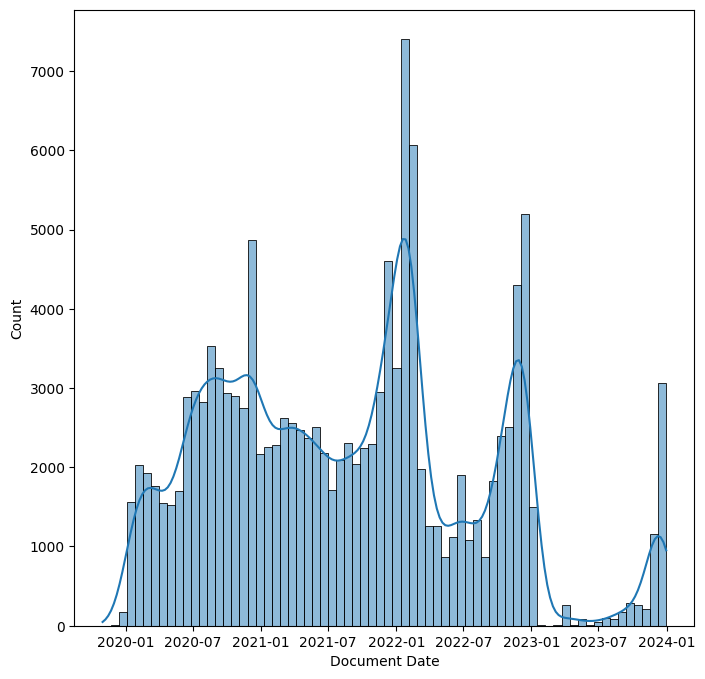

In [99]:
plt.figure(figsize=(8, 8))
sns.histplot(df['Document Date'], kde=True, bins = 70)
plt.show()

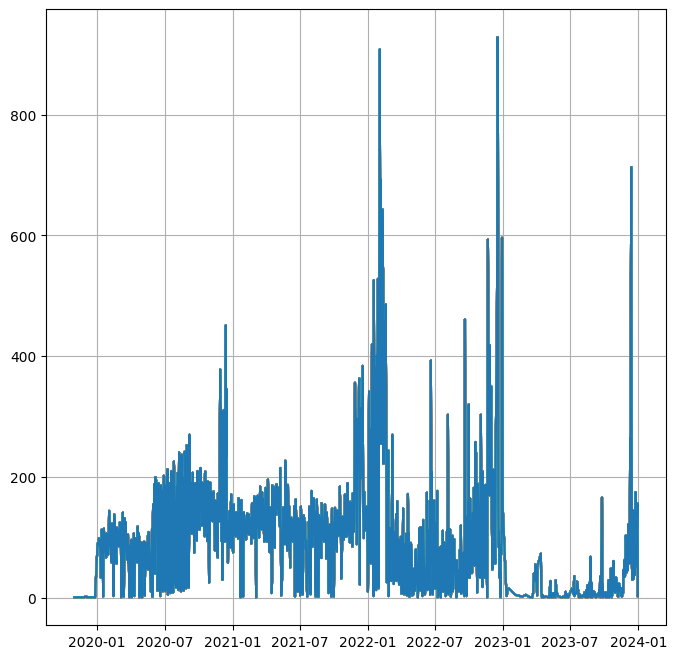

In [100]:
plt.figure(figsize=(8, 8))
date = [date for date, df in df.groupby('Document Date')]
plt.plot(date, df.groupby(['Document Date']).count())
plt.grid()

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134688 entries, 0 to 134687
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Division                        134688 non-null  int64         
 1   Division Name                   134688 non-null  int64         
 2   Distribution Channel            134688 non-null  int64         
 3   Distribution Channel Name       134688 non-null  int64         
 4   Sales Document Type             134688 non-null  int64         
 5   Sales Document Type.1           134688 non-null  int64         
 6   Sales Document Item             134688 non-null  int64         
 7   Document Date                   134688 non-null  datetime64[ns]
 8   Sold-To Party                   134688 non-null  float64       
 9   Sold-To Party Name              134688 non-null  int64         
 10  Material                        134688 non-null  int64  

In [102]:
df_all.shape

(134688, 6)

# ***Splitting it into 70%***

In [103]:
0.7*326420

228494.0

In [104]:
train_df11 =df_all.loc[:228494]
test_df11 =df_all.loc[228495:]
train_df11.head()

,Document Date,year,month,day,weekday,Net Value (Item)
0,2020-09-07,2020,9,7,7,742.13
1,2020-12-31,2020,12,31,3,35709.59
2,2020-12-31,2020,12,31,3,1404.00
3,2020-12-31,2020,12,31,3,909.51
4,2020-12-31,2020,12,31,3,964.75


In [105]:
train_df11.shape

(134688, 6)

In [106]:
x = df[['Net Value (Item)', 'Item Type', 'Material', 'Order Quantity (Schedule Line)', 'Shipping Point/Receiving Pt']]

In [107]:
x.head()

,Net Value (Item),Item Type,Material,Order Quantity (Schedule Line),Shipping Point/Receiving Pt
0,742.13,11,9077,1.00,15
1,35709.59,6,1487,1162.80,13
2,1404.00,4,1135,36.00,12
3,909.51,4,4467,14.04,12
4,964.75,11,8674,1.00,15


In [108]:
x.shape

(134688, 5)

In [109]:
y = x.drop('Net Value (Item)', axis=1)

In [110]:
pred_df11 = test_df11.drop('Net Value (Item)', axis=1)

# ***Implementing the Model***

In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 207.09116649310818
R-squared: 0.9820421503618616
